In [1]:
import numpy                     as     np
import pandas                    as     pd
from   scipy.stats               import ttest_1samp, ttest_ind
import matplotlib.pyplot         as     plt
import matplotlib
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sm

In [2]:
wholesale = pd.read_csv('Wholesale.csv')

In [3]:
wholesale.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
wholesale.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [5]:
wholesale.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [6]:
df = wholesale.groupby(['Channel']).sum()
df

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,,
Hotel,71034,4015717,1028614,1180717,1116979,235587,421955
Retail,25986,1264414,1521743,2317845,234671,1032270,248988


In [7]:
df.drop('Buyer/Spender', axis=1, inplace=True)
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,
Hotel,4015717,1028614,1180717,1116979,235587,421955
Retail,1264414,1521743,2317845,234671,1032270,248988


In [8]:
df['total']=df.sum(axis=1)
df


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total
Channel,,,,,,,
Hotel,4015717,1028614,1180717,1116979,235587,421955,7999569
Retail,1264414,1521743,2317845,234671,1032270,248988,6619931


In [9]:
df =wholesale.groupby(['Region']).sum()
df

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,,
Lisbon,18095,854833,422454,570037,231026,204136,104327
Oporto,14899,464721,239144,433274,190132,173311,54506
Other,64026,3960577,1888759,2495251,930492,890410,512110


In [10]:
df.drop('Buyer/Spender', axis=1, inplace=True)
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,
Lisbon,854833,422454,570037,231026,204136,104327
Oporto,464721,239144,433274,190132,173311,54506
Other,3960577,1888759,2495251,930492,890410,512110


In [11]:
df['total']=df.sum(axis=1)
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,total
Region,,,,,,,
Lisbon,854833,422454,570037,231026,204136,104327,2386813
Oporto,464721,239144,433274,190132,173311,54506,1555088
Other,3960577,1888759,2495251,930492,890410,512110,10677599


In [12]:
df = wholesale
df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125


In [13]:
df.drop('Buyer/Spender', axis=1, inplace = True)
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Hotel,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,Hotel,Other,29703,12051,16027,13135,182,2204
436,Hotel,Other,39228,1431,764,4510,93,2346
437,Retail,Other,14531,15488,30243,437,14841,1867
438,Hotel,Other,10290,1981,2232,1038,168,2125


In [14]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    object
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicatessen      440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 27.6+ KB


D:\download data\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


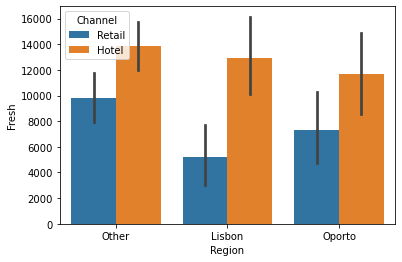

In [16]:
sns.barplot(df['Region'], df['Fresh'], hue=df['Channel']);


D:\download data\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


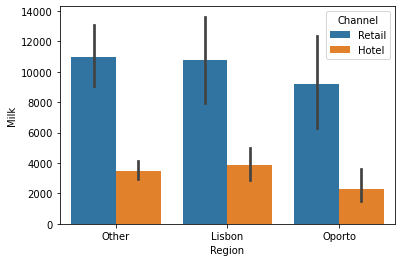

In [17]:
sns.barplot(df['Region'], df['Milk'], hue=df['Channel']);

D:\download data\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


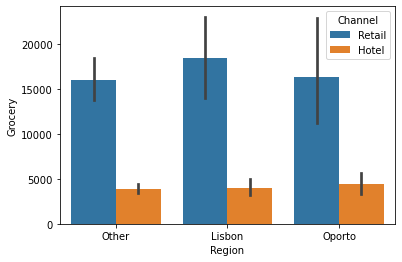

In [18]:
sns.barplot(df['Region'], df['Grocery'], hue=df['Channel']);

D:\download data\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


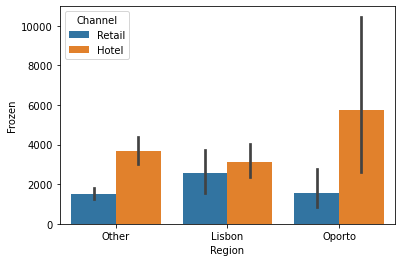

In [19]:
sns.barplot(df['Region'], df['Frozen'], hue=df['Channel']);

D:\download data\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


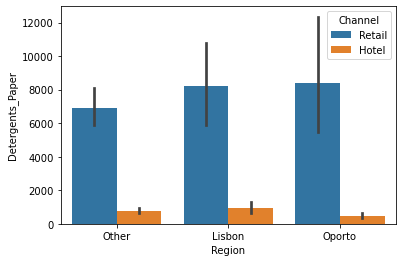

In [20]:
sns.barplot(df['Region'], df['Detergents_Paper'], hue=df['Channel']);

D:\download data\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


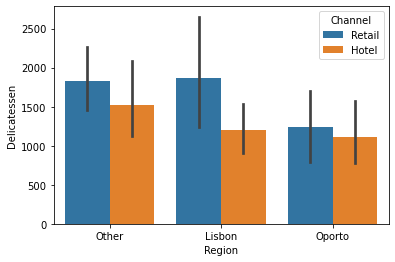

In [21]:
sns.barplot(df['Region'], df['Delicatessen'], hue=df['Channel']);

In [22]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [23]:
COV_fresh = (12647.328865/12000.297727)
COV_fresh

1.0539179237648593

In [24]:
COV_Milk = (7380.377175/5796.265909)
COV_Milk

1.2732985841005522

In [25]:
COV_Grocery = (9503.162829/7951.277273)
COV_Grocery

1.1951743729613995

In [26]:
COV_Frozen = (4854.673333/3071.931818)
COV_Frozen

1.5803323838615222

In [27]:
COV_Detergents = (4767.854448/2881.493182)
COV_Detergents

1.6546471384293562

In [28]:
COV_Delicatessen = (2820.105937/1524.870455)
COV_Delicatessen

1.849406897322304

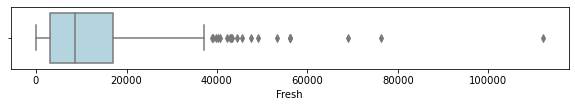

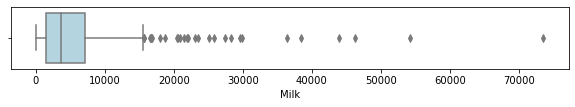

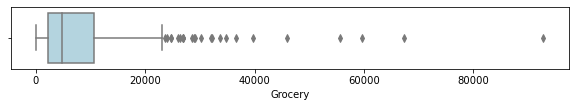

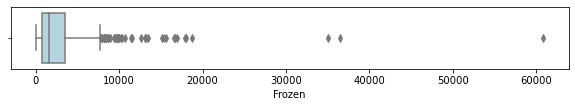

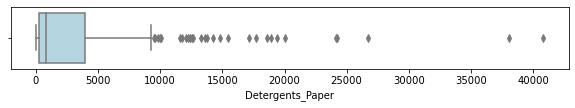

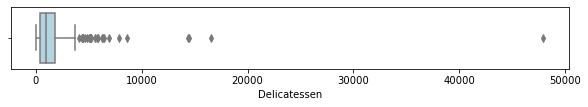

In [29]:
plt.figure(figsize = (10,8))
plt.subplot(6,1,1)
sns.boxplot(x = df.Fresh, color = 'lightblue')

plt.figure(figsize = (10,8))
plt.subplot(6,1,2)
sns.boxplot(x = df.Milk, color = 'lightblue')

plt.figure(figsize = (10,8))
plt.subplot(6,1,3)
sns.boxplot(x = df.Grocery, color = 'lightblue')
plt.show()

plt.figure(figsize = (10,8))
plt.subplot(6,1,4)
sns.boxplot(x = df.Frozen, color = 'lightblue')
plt.show()

plt.figure(figsize = (10,8))
plt.subplot(6,1,5)
sns.boxplot(x = df.Detergents_Paper, color = 'lightblue')
plt.show()

plt.figure(figsize = (10,8))
plt.subplot(6,1,6)
sns.boxplot(x = df.Delicatessen, color = 'lightblue')
plt.show()

In [30]:
df=pd.read_csv('Survey.csv')

In [31]:
df

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


In [32]:
df.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


In [33]:
df.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [35]:
df.drop('ID', axis=1, inplace=True)
df

,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


In [36]:
df.describe()

,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


In [37]:
pd.crosstab(df['Gender'], df['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [38]:
pd.crosstab(df['Gender'], df['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [39]:
pd.crosstab(df['Gender'], df['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [40]:
pd.crosstab(df['Gender'], df['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [41]:
df['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [42]:
probalityofmale = (29/(33+29))*100
probalityofmale

46.774193548387096

In [43]:
probalityoffemale = (33/(33+29))*100
probalityoffemale

53.2258064516129

In [44]:
pd.crosstab(df['Gender'], df['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [45]:
df['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [46]:
#Probability of Males opting for Accounting
accounting=(4/29)*100
accounting

13.793103448275861

In [47]:
#Probability of Males opting for CIS
CIS=(1/29)*100
CIS

3.4482758620689653

In [48]:
#Probability of Males opting for Economics/Finance
Economics = (4/29)*100
Economics

13.793103448275861

In [49]:
#Probability of Males opting for InternationalBusiness
IB = (2/29)*100
IB

6.896551724137931

In [50]:
#Probability of Males opting for Management
Management = (6/29)*100
Management

20.689655172413794

In [51]:
#Probability of Males opting for Other
other = (4/29)*100
other

13.793103448275861

In [52]:
#Probability of Males opting for Retailing/Marketing
Marketing = (5/29)*100
Marketing

17.24137931034483

In [53]:
#Probability of Males opting for Undecided
undecided = (3/29)*100
undecided

10.344827586206897

In [54]:
#Probability of Females opting for Accounting
Accounting = (3/33)*100
Accounting

9.090909090909092

In [55]:
#Probability of Females opting for CIS
CIS = (3/33)*100
CIS

9.090909090909092

In [56]:
#Probability of Females opting for Economics/Finance
Eco = (7/33)*100
Eco

21.21212121212121

In [57]:
#Probability of Females opting for InternationalBusiness
IB = (4/33)*100
IB

12.121212121212121

In [58]:
#Probability of Females opting for Management
Management = (4/33)*100
Management

12.121212121212121

In [59]:
#Probability of Females opting for Other
other = (3/33)*100
other

9.090909090909092

In [60]:
#Probability of Females opting for Retailing/Marketing
Retail = (9/33)*100
Retail

27.27272727272727

In [61]:
#Probability of Females opting for Undecided
undecided = (0/33)*100
undecided

0.0

In [62]:
pd.crosstab(df['Gender'], df['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [63]:
#Total no of males = 29
#total no grad male intented to graduate = 17
#Probability of Males and intends to be Graduate
Probability = (17/29)*100
Probability

58.620689655172406

In [64]:
pd.crosstab(df['Gender'], df['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [65]:
probability = (4/33)*100
probability

12.121212121212121

In [66]:
pd.crosstab(df['Gender'], df['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [67]:
#the probability that a randomly chosen student is a male or has full-time employment?
#Total Male = 29
#Full time = 7
Probability = (10/29)*100
Probability

34.48275862068966

In [68]:
pd.crosstab(df['Gender'], df['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [69]:
#total no of females = 33
#number of females majoring in international business or management=8
Probability = (8/33)*100
Probability

24.242424242424242

In [70]:
pd.crosstab(df['Gender'], df['GPA'])

GPA,2.3,2.4,2.5,2.6,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9
Gender,,,,,,,,,,,,,,,,
Female,1,1,2,0,1,3,5,2,4,3,2,4,1,2,1,1
Male,0,0,4,2,2,1,2,5,2,2,5,2,2,0,0,0


In [71]:
#total male with GPA less than 3 are 9
#total fremale with GPA less than 3 are 8
#total students = 17
probability = (17/62)*100
probability

27.419354838709676

In [72]:
data = pd.crosstab(df['Gender'], df['Grad Intention'])
data

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [73]:
data.drop('Undecided', axis=1, inplace = True)
data

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [74]:
data['total']=data.sum(axis=1)
data

Grad Intention,No,Yes,total
Gender,,,
Female,9,11,20
Male,3,17,20


In [75]:
#total no = 12
#total yes = 28

In [76]:
pd.crosstab(df['Gender'], df['GPA'])

GPA,2.3,2.4,2.5,2.6,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9
Gender,,,,,,,,,,,,,,,,
Female,1,1,2,0,1,3,5,2,4,3,2,4,1,2,1,1
Male,0,0,4,2,2,1,2,5,2,2,5,2,2,0,0,0


In [77]:
#total no of students = 62
#no of students GPA less than 3 = 17
probability = (17/62)*100
probability

27.419354838709676

In [78]:
pd.crosstab(df['Gender'], df['Salary'])

Salary,25.0,30.0,35.0,37.0,37.5,40.0,42.0,45.0,47.0,47.5,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0
Gender,,,,,,,,,,,,,,,,,,,
Female,0,5,1,0,1,5,1,1,0,1,5,0,0,5,5,0,1,1,1
Male,1,0,1,1,0,7,0,4,1,0,4,1,1,3,3,1,0,0,1


In [79]:
#total no of male = 29
#total no of female = 33
#no of male earning 50 or more = 14
#no of female earning 50 or more = 18
PM = (14/62)*100
PM

22.58064516129032

In [80]:
PF = (18/62)*100
PF

29.03225806451613

In [81]:
pd.crosstab(df['Gender'], df['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [97]:
#total no of males = 29
#no of males who are full time employed = 7
PM = (7/29)*100
PM

24.137931034482758

D:\download data\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


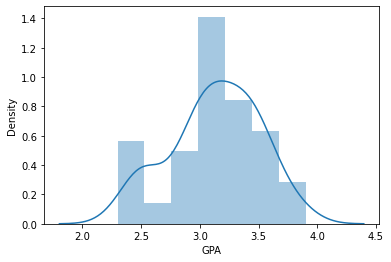

In [82]:
sns.distplot(df['GPA']);

D:\download data\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


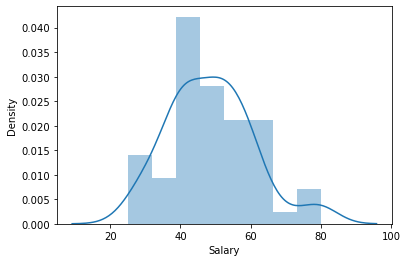

In [83]:
sns.distplot(df['Salary'],kde=True);

D:\download data\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


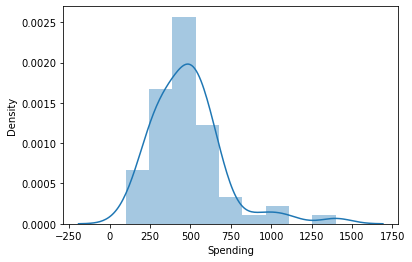

In [84]:
sns.distplot(df['Spending']);

D:\download data\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


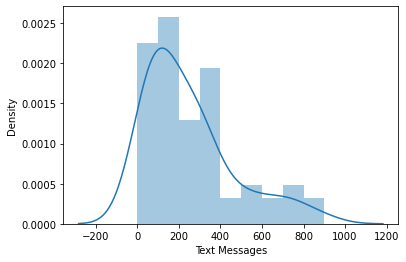

In [85]:
sns.distplot(df['Text Messages']);

In [86]:
df = pd.read_csv('Shingles.csv')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [88]:
df.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


In [89]:
df.isnull().sum()

A    0
B    5
dtype: int64

In [90]:
t_statistic, p_value = ttest_1samp(df.A, 0.35)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value/2))


One sample t test 
t statistic: -1.4735046253382782 p value: 0.07477633144907513 


In [91]:
t_statistic, p_value = ttest_1samp(df.B, 0.35,nan_policy='omit' )
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value/2))


One sample t test 
t statistic: -3.1003313069986995 p value: 0.0020904774003191826 


In [92]:
#H0 : μ(A)= μ(B)
#Ha : μ(A)!= μ(B) 
#α = 0.05


In [93]:
t_statistic,p_value=ttest_ind(df['A'],df['B'],equal_var=True ,nan_policy='omit') 

In [94]:
print("t_statistic={} and pvalue={}".format(round(t_statistic,3),round(p_value,3)))

t_statistic=1.29 and pvalue=0.202
